<a href="https://colab.research.google.com/github/Karnis052/ML/blob/main/Bangla_hand_written_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [ ]:
# upload kaggle.json
# from google.colab import files
# files.upload()
!wget https://www.dropbox.com/s/kc77yps787sqt92/kaggle.json 

--2023-02-08 08:53:11--  https://www.dropbox.com/s/kc77yps787sqt92/kaggle.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kc77yps787sqt92/kaggle.json [following]
--2023-02-08 08:53:11--  https://www.dropbox.com/s/raw/kc77yps787sqt92/kaggle.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba29515c9ced37a09b5a7e75ee.dl.dropboxusercontent.com/cd/0/inline/B2FOJJVGtBloMpvGTvioMP8uNNezm488-VGd6_eXURJOAwvUjUA3zltmCyZxgErU0nV8PhHZlx_yUTQbf9TbY8YsZEfC1ofR-t550rRg_QWziIYRUgh8WpPzKq4IaNV3Kh_11nVG-wF47raAeeTWIjfIQFKdByeXm-t7SWcKUtIcpw/file# [following]
--2023-02-08 08:53:11--  https://ucba29515c9ced37a09b5a7e75ee.dl.dropboxusercontent.com/cd/0/inline/B2FOJJVGtBloMpvGTvioMP8uNNezm488-VGd6_eXURJOAwvUjUA3zltmCyZxgErU0nV8PhHZlx_yUTQb

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download BengaliAI/numta

100% 1.91G/1.91G [01:06<00:00, 40.2MB/s]
100% 1.91G/1.91G [01:06<00:00, 31.0MB/s]


In [ ]:
 import os 
 import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("./numta.zip","r")
zip_ref.extractall("numta")
zip_ref.close()

In [ ]:
train = pd.read_csv(os.path.join("./numta/training-a.csv"))
test =  pd.read_csv(os.path.join("./numta/training-b.csv"))


In [ ]:
train.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [ ]:
train.head(10)

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a
5,a00005.png,Scan_247_digit_4_num_8.png,247,4,BHDDB,Buet_Broncos,training-a
6,a00006.png,Scan_205_digit_3_num_6.png,205,3,BHDDB,Buet_Broncos,training-a
7,a00007.png,Scan_252_digit_0_num_7.png,252,0,BHDDB,Buet_Broncos,training-a
8,a00008.png,Scan_212_digit_4_num_5.png,212,4,BHDDB,Buet_Broncos,training-a
9,a00009.png,Scan_207_digit_9_num_1.png,207,9,BHDDB,Buet_Broncos,training-a


In [ ]:
train.shape 

(19702, 7)

In [ ]:
train = train[["filename", 'digit']]
test = test[["filename", 'digit']]
train.shape

(19702, 2)

In [ ]:
train.head(10)

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
5,a00005.png,4
6,a00006.png,3
7,a00007.png,0
8,a00008.png,4
9,a00009.png,9


In [ ]:
train.isnull().sum()

filename    0
digit       0
dtype: int64

In [ ]:
img_path = train.iloc[0, 0]
img_path

'a00000.png'

(180, 180, 3)


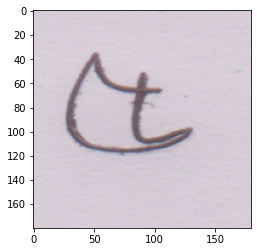

In [ ]:
img_path = os.path.join("./numta/training-a/a00000.png")
img = plt.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
train.iloc[0, 1]

5

In [ ]:
train.shape

(19702, 2)

In [ ]:
train.values  # gives all values of a dataframe

array([['a00000.png', 5],
       ['a00001.png', 3],
       ['a00002.png', 1],
       ...,
       ['a19699.png', 8],
       ['a19700.png', 3],
       ['a19701.png', 8]], dtype=object)

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("./numta/training-a")
new_base_dir = pathlib.Path("Reformed_training")
if not os.path.exists(new_base_dir):
    os.mkdir(new_base_dir)
for frame, labels in train.values:
  if not os.path.exists(new_base_dir/str(labels)):
    os.mkdir(new_base_dir/str(labels))

  dst = new_base_dir/str(labels)/frame
  shutil.copyfile(src = original_dir/frame, dst = dst)




#   img_path = os.path.join(base_path, train.iloc[i,0])
#   img = load_img(img_path, target_size = (180, 180, 3))
#   x = img_to_array(img)
#   x = np.expand_dims(x, axis =0)
#   y = np.expand_dims(train.iloc[i,1], axis =0)


In [ ]:
original_dir = pathlib.Path("./numta/training-b")
new_base_dir = pathlib.Path("Reformed_test")
if not os.path.exists(new_base_dir):
    os.mkdir(new_base_dir)
for frame, labels in test.values:
  if not os.path.exists(new_base_dir/str(labels)):
    os.mkdir(new_base_dir/str(labels))

  dst = new_base_dir/str(labels)/frame
  shutil.copyfile(src = original_dir/frame, dst = dst)

In [ ]:
base_dir = pathlib.Path("./Reformed_training")
for subdir in os.listdir(base_dir):
  dir = base_dir/subdir
  print(f"size of  data in {subdir} is {len(os.listdir(dir))}")


size of  data in 8 is 1950
size of  data in 6 is 1983
size of  data in 2 is 1984
size of  data in 4 is 1982
size of  data in 1 is 1963
size of  data in 9 is 1964
size of  data in 7 is 1960
size of  data in 5 is 1965
size of  data in 0 is 1975
size of  data in 3 is 1976


In [ ]:
original_dir = pathlib.Path("Reformed_training")
new_base_dir = pathlib.Path("Reformed_small")
if not os.path.exists(new_base_dir):
  os.mkdir(new_base_dir)


def make_subset(subset_name, start_index, end_index):
  for category in  os.listdir(original_dir): 
    dir = new_base_dir/subset_name/category
    if not os.path.exists(dir):
        os.makedirs(dir)
    frames =  os.listdir(original_dir/category)
    new_frames = [os.path.join(frame) for frame in frames[start_index:end_index]]
    for frame in new_frames:
      shutil.copyfile(src = original_dir/category/frame, dst = dir/frame)


make_subset("train", start_index =0, end_index= 1200)
make_subset("validation", start_index =1200, end_index= 1300)
make_subset("test", start_index =1300, end_index= 1400)

In [ ]:
base_dir = pathlib.Path("./Reformed_small/train")
print("Train data size for each category: ")
for subdir in os.listdir(base_dir):
  dir = base_dir/subdir
  print(f"size of  data in {subdir} is {len(os.listdir(dir))}")

Train data size for each category: 
size of  data in 8 is 1200
size of  data in 6 is 1200
size of  data in 2 is 1200
size of  data in 4 is 1200
size of  data in 1 is 1200
size of  data in 9 is 1200
size of  data in 7 is 1200
size of  data in 5 is 1200
size of  data in 0 is 1200
size of  data in 3 is 1200


In [ ]:
base_dir = pathlib.Path("./Reformed_small/test")
print("Test data size for each category: ")
for subdir in os.listdir(base_dir):
  dir = base_dir/subdir
  print(f"size of  data in {subdir} is {len(os.listdir(dir))}")

Test data size for each category: 
size of  data in 8 is 100
size of  data in 6 is 100
size of  data in 2 is 100
size of  data in 4 is 100
size of  data in 1 is 100
size of  data in 9 is 100
size of  data in 7 is 100
size of  data in 5 is 100
size of  data in 0 is 100
size of  data in 3 is 100


In [ ]:
base_dir = pathlib.Path("./Reformed_small/validation")
print("Validation data size for each category: ")
for subdir in os.listdir(base_dir):
  dir = base_dir/subdir
  print(f"size of  data in {subdir} is {len(os.listdir(dir))}")

Validation data size for each category: 
size of  data in 8 is 100
size of  data in 6 is 100
size of  data in 2 is 100
size of  data in 4 is 100
size of  data in 1 is 100
size of  data in 9 is 100
size of  data in 7 is 100
size of  data in 5 is 100
size of  data in 0 is 100
size of  data in 3 is 100


In [ ]:
inputs = keras.Input(shape= (180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 512, kernel_size = 3, activation ="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "bangla_hand_written_digit_pure.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
train_dir = pathlib.Path("/content/Reformed_small/train")
test_dir =  pathlib.Path("/content/Reformed_small/test")
validation_dir = pathlib.Path("/content/Reformed_small/validation")
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size = (180, 180),
    batch_size = 32
)
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size = (180, 180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size = (180, 180),
    batch_size = 32
)

Found 12000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [ ]:
for data_batch, label_batch in train_dataset:
  print(data_batch.shape, label_batch.shape)
  break

(32, 180, 180, 3) (32,)


# Wait! Wait! Wait!  it is time consuming hole. Confirm again run before

In [ ]:
history = model.fit(
    train_dataset,
    epochs = 30,
    batch_size=32,
    validation_data = test_dataset,
    callbacks = callbacks
   )

Epoch 1/30
375/375 [==============================] - 36s 72ms/step - loss: 1.5335 - accuracy: 0.4565 - val_loss: 0.6088 - val_accuracy: 0.8220
Epoch 2/30
375/375 [==============================] - 22s 59ms/step - loss: 0.3448 - accuracy: 0.8914 - val_loss: 0.2747 - val_accuracy: 0.9100
Epoch 3/30
375/375 [==============================] - 21s 56ms/step - loss: 0.1563 - accuracy: 0.9492 - val_loss: 0.1835 - val_accuracy: 0.9460
Epoch 4/30
375/375 [==============================] - 22s 59ms/step - loss: 0.1071 - accuracy: 0.9653 - val_loss: 0.1901 - val_accuracy: 0.9450
Epoch 5/30
375/375 [==============================] - 23s 59ms/step - loss: 0.0742 - accuracy: 0.9752 - val_loss: 0.1501 - val_accuracy: 0.9640
Epoch 6/30
375/375 [==============================] - 22s 58ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.1443 - val_accuracy: 0.9600
Epoch 7/30
375/375 [==============================] - 21s 55ms/step - loss: 0.0366 - accuracy: 0.9893 - val_loss: 0.1879 - val_accuracy:

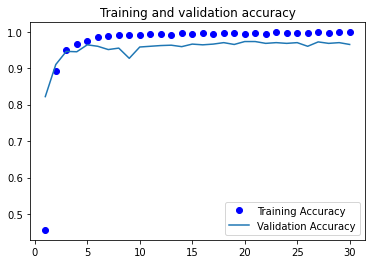

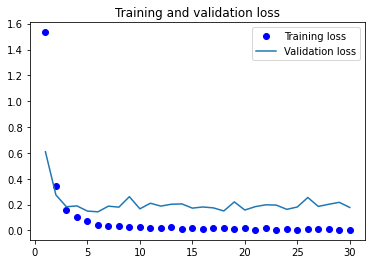

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)
plt.plot(epochs, accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

In [ ]:
test_model = keras.models.load_model("/content/bangla_hand_written_digit_pure.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy using Convulation and Polling Layer: {test_acc}")

32/32 [==============================] - 1s 34ms/step - loss: 0.1443 - accuracy: 0.9600
Test accuracy using Convulation and Polling Layer: 0.9599999785423279


In [ ]:
for test_img, y in test_dataset:
  for i in y:
    print(i)
  break

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype

In [ ]:
y_true = []
y_pred = []
for x,y in test_dataset:
  for i in y:
    y_true.append(i)
  y_pred.append(tf.argmax(test_model.predict(x),axis = 1))
  
y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

1/1 [==============================] - 0s 77ms/step


In [ ]:
confusion_mat = confusion_matrix(y_pred,y_true)
confusion_mat

array([[100,   1,   0,   6,   0,   5,   1,   1,   1,   1],
       [  0,  95,   1,   1,   1,   0,   1,   0,   0,   3],
       [  0,   0,  99,   0,   1,   0,   0,   0,   0,   3],
       [  0,   0,   0,  92,   0,   0,   1,   1,   0,   0],
       [  0,   0,   0,   0,  97,   0,   0,   1,   0,   0],
       [  0,   0,   0,   1,   0,  93,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,  97,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0,  97,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98,   0],
       [  0,   4,   0,   0,   0,   0,   0,   0,   0,  92]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       100
           1       0.93      0.95      0.94       100
           2       0.96      0.99      0.98       100
           3       0.98      0.92      0.95       100
           4       0.99      0.97      0.98       100
           5       0.99      0.93      0.96       100
           6       0.97      0.97      0.97       100
           7       0.98      0.97      0.97       100
           8       1.00      0.98      0.99       100
           9       0.96      0.92      0.94       100

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



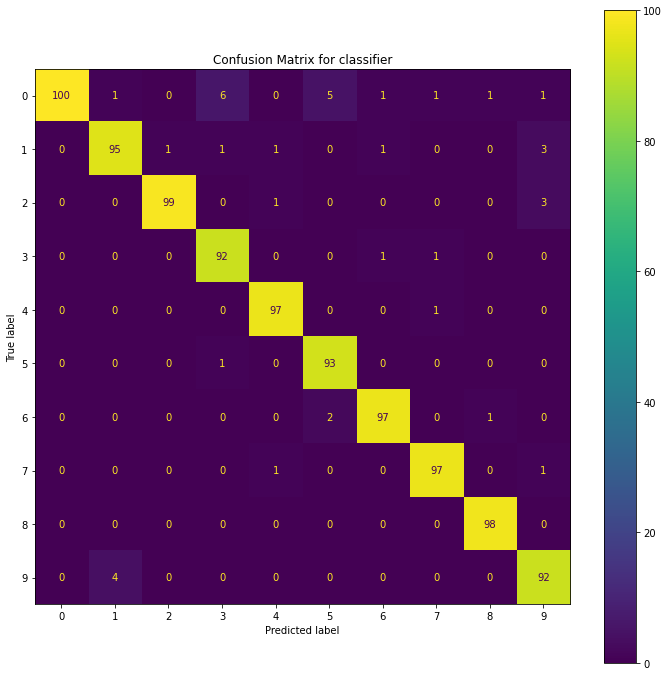

In [ ]:
cm =ConfusionMatrixDisplay(confusion_mat)
fig, ax = plt.subplots(figsize = (12,12))
cm.plot(ax=ax)
plt.title("Confusion Matrix for classifier")
plt.savefig("Confusion_matrix1.png")
plt.show()

# Data Augmentation + Fine Tuning using Xception keras application

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
) 

## Initiating Xception as base_conv

In [ ]:
conv_base = tf.keras.applications.xception.Xception(
    weights = "imagenet",
    include_top = False,
    classifier_activation='softmax',
    input_shape = (180,180,3)

)

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 89, 89, 32)   864         ['input_8[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 89, 89, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-6]:
  layer.trainable = False

In [ ]:
inputs = keras.Input(shape = (180,180, 3))
x = data_augmentation(inputs)
x = keras.applications.xception.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256,activation = "relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10, activation = "softmax")(x)

model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 180, 180, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 180, 180, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_6 (Flatten)         (None, 73728)             0   

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
    metrics = ["accuracy"]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "bangla_hand_written_digit_augementation_and_fine_tuning.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs = 40,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/40
375/375 [==============================] - 59s 148ms/step - loss: 0.7991 - accuracy: 0.7476 - val_loss: 0.3787 - val_accuracy: 0.8870
Epoch 2/40
375/375 [==============================] - 55s 146ms/step - loss: 0.4103 - accuracy: 0.8696 - val_loss: 0.2742 - val_accuracy: 0.9090
Epoch 3/40
375/375 [==============================] - 56s 148ms/step - loss: 0.3121 - accuracy: 0.8995 - val_loss: 0.2218 - val_accuracy: 0.9320
Epoch 4/40
375/375 [==============================] - 56s 148ms/step - loss: 0.2627 - accuracy: 0.9193 - val_loss: 0.2037 - val_accuracy: 0.9440
Epoch 5/40
375/375 [==============================] - 55s 147ms/step - loss: 0.2405 - accuracy: 0.9220 - val_loss: 0.1793 - val_accuracy: 0.9480
Epoch 6/40
375/375 [==============================] - 56s 147ms/step - loss: 0.2040 - accuracy: 0.9348 - val_loss: 0.1496 - val_accuracy: 0.9510
Epoch 7/40
375/375 [==============================] - 56s 147ms/step - loss: 0.1819 - accuracy: 0.9411 - val_loss: 0.1469 - val_ac

In [ ]:
test_model = keras.models.load_model("bangla_hand_written_digit_augementation_and_fine_tuning.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy using data augmentation and fine-tuning a pretrain model: {test_acc: 0.3f}")

32/32 [==============================] - 4s 86ms/step - loss: 0.0921 - accuracy: 0.9750
Test accuracy using data augmentation and fine-tuning a pretrain model:  0.975


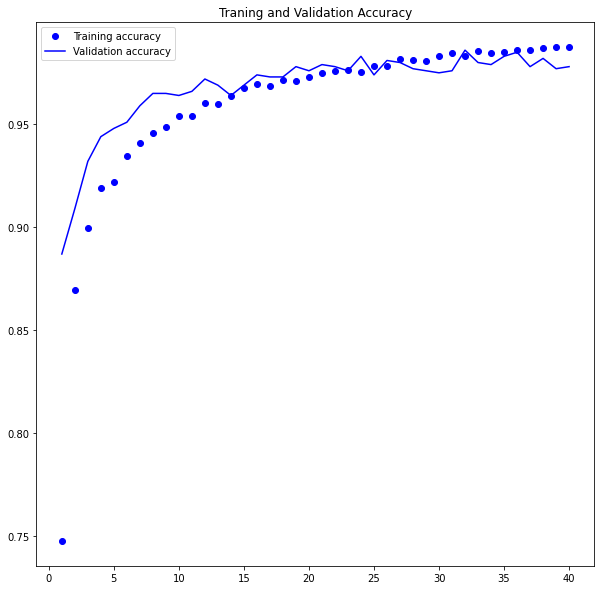

<Figure size 432x288 with 0 Axes>

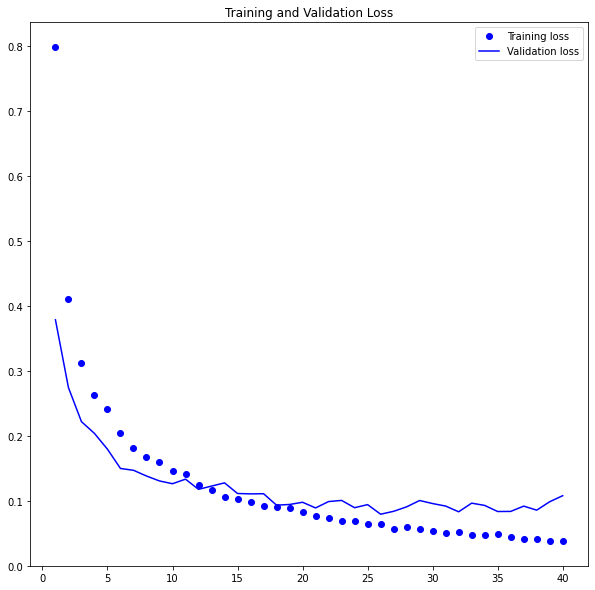

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

fig, ax = plt.subplots(1,1, figsize = (10,10))

epochs = range(1, len(acc)+1)
ax.plot(epochs, acc, "bo", label = "Training accuracy")
ax.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Traning and Validation Accuracy")
plt.legend()
plt.savefig("Traning and Validation Accuracy.png")
plt.figure()
plt.show()

fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.plot(epochs, loss, "bo", label ="Training loss")
ax.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.savefig("Traning and Validation loss.png")
plt.figure()
plt.show()

In [ ]:
y_true = []
y_pred = []
for x,y in test_dataset:
  for i in y:
    y_true.append(i)
  y_pred.append(tf.argmax(test_model.predict(x),axis = 1))
  
y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

1/1 [==============================] - 1s 698ms/step


In [ ]:
print(y_pred.shape)
print(y_true.shape)

(1000,)
(1000,)


In [ ]:
confusion_mat = confusion_matrix(y_pred,y_true)
confusion_mat

array([[ 98,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  94,   1,   0,   0,   0,   0,   0,   0,   2],
       [  0,   1,  99,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,  99,   0,   1,   2,   0,   0,   0],
       [  0,   0,   0,   0,  98,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   1,  96,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,  98,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0,   0,  97,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0, 100,   0],
       [  0,   2,   0,   0,   0,   2,   0,   3,   0,  96]])

In [ ]:
print( classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.97      0.94      0.95       100
           2       0.99      0.99      0.99       100
           3       0.95      0.99      0.97       100
           4       1.00      0.98      0.99       100
           5       0.97      0.96      0.96       100
           6       0.97      0.98      0.98       100
           7       1.00      0.97      0.98       100
           8       0.98      1.00      0.99       100
           9       0.93      0.96      0.95       100

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.97      0.98      1000



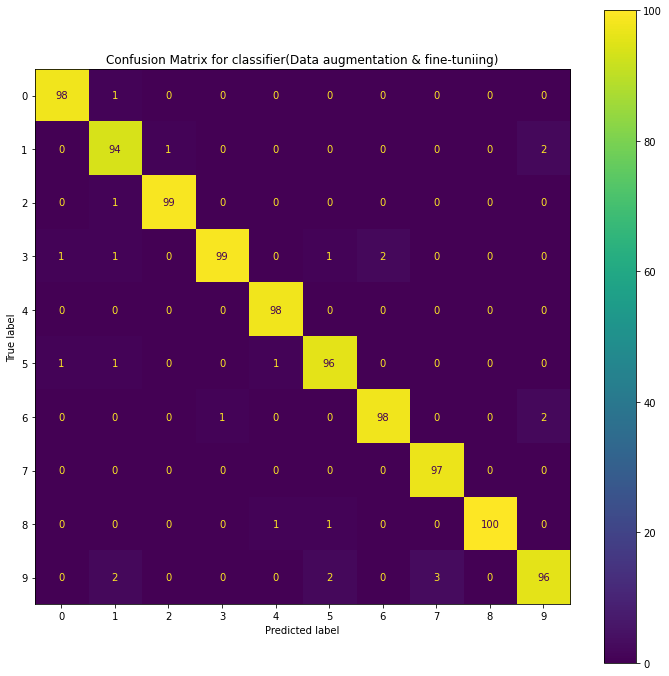

In [ ]:
cm =ConfusionMatrixDisplay(confusion_mat)
fig, ax = plt.subplots(figsize = (12,12))
cm.plot(ax=ax)
plt.title("Confusion Matrix for classifier(Data augmentation & fine-tuniing)")
plt.savefig("Confusion_matrix2.png")
plt.show()